<a href="https://colab.research.google.com/github/Linkonb/Mobile_Finance_Fraud_Detection/blob/main/Mobile_Finance_Fraud_Detection_by_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
data_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data_df.count()

In [5]:
data_df=data_df.dropna()
data_df.count()
data_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
data_df['SnameOrig']=data_df['nameOrig'].str[0:1]
data_df['SnameOrig'].head(10)

0    C
1    C
2    C
3    C
4    C
5    C
6    C
7    C
8    C
9    C
Name: SnameOrig, dtype: object

In [7]:
data_df['SnameDest']=data_df['nameDest'].str[0:1]
data_df['SnameDest'].head(10)

0    M
1    M
2    C
3    C
4    M
5    M
6    M
7    M
8    M
9    C
Name: SnameDest, dtype: object

In [8]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,M


In [9]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()

In [10]:
data_df['type'] = lableencoder_X_2.fit_transform(data_df['type'])
data_df['nameOrig'] = lableencoder_X_2.fit_transform(data_df['nameOrig'])
data_df['nameDest'] = lableencoder_X_2.fit_transform(data_df['nameDest'])
data_df['SnameOrig'] = lableencoder_X_2.fit_transform(data_df['SnameOrig'])
data_df['SnameDest'] = lableencoder_X_2.fit_transform(data_df['SnameDest'])

In [14]:
from sklearn.model_selection import train_test_split
#X=data_df[['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','SnameOrig','SnameDest']]
X=data_df[['step','type','amount','nameOrig','nameDest','SnameOrig','SnameDest']]
Y=data_df[['isFraud']]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [24]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [25]:
model = lgb.LGBMClassifier()

# fit the model with the training data
model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 5776, number of negative: 4448058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.167992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 4453834, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001297 -> initscore=-6.646511
[LightGBM] [Info] Start training from score -6.646511


LGBMClassifier()

In [26]:

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)



Target on train data [0 0 0 ... 0 0 0]


In [31]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.9988169743192046


In [33]:

# predict the target on the train dataset
predict_train = model.predict(X_test)
print('\nTarget on train data',predict_train)


Target on train data [0 0 0 ... 0 0 0]


[[1905861     488]
 [   1972     465]]


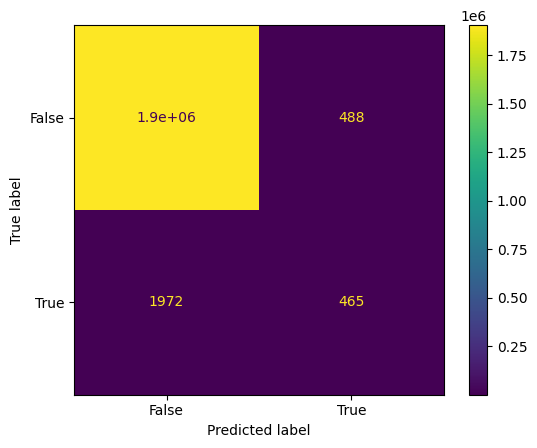

In [36]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predict_train)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()